# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [197]:
# importing required libraries`
import json
import pandas as pd
import requests
import tweepy
from timeit import default_timer as timer
from tweepy import OAuthHandler
import numpy as np

In [198]:
# Necessary Settings
pd.set_option("mode.chained_assignment", None)
import warnings
warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups.')

In [199]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [200]:
request = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
file = open('image-predictions.tsv', 'w')
file.write(request.text)

335079

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [201]:
TWITTER_API_KEY = 'how about just a string'
TWITTER_BEARER_TOKEN = 'and here too'
TWITTER_API_SECRET = 'oh my god! here too'
TWITTER_ACCESS_TOKEN = 'und auch hier'
TWITTER_ACCESS_TOKEN_SECRET = 'und hier'
auth = OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [202]:
# The three data sets
# 1. twitter_archive_enhanced
# loaded above
# 2
downloaded_tweets = pd.read_json('tweet_json.txt', lines=True)
downloaded_tweets = pd.DataFrame(downloaded_tweets, columns = ['id', 'favorite_count', 'retweet_count'])
# 3
image_predictions = pd.read_csv('image-predictions.tsv', delim_whitespace = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### TWITTER ARCHIVE ENHANCED DATAFRAME

In [203]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [204]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [205]:
twitter_archive_enhanced.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1669,682429480204398592,NaN,NaN,2015-12-31 05:14:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we joke around on here, but this is get...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682429480...,8,10,None,None,None,None,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None
196,854732716440526848,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,None,None,None,None
489,813910438903693312,NaN,NaN,2016-12-28 00:52:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813910438...,11,10,Chubbs,doggo,None,None,None
2231,668226093875376128,NaN,NaN,2015-11-22 00:34:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sneaky dog here. Tuba player has no clue. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668226093...,10,10,None,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,None,None,None,pupper,None
1654,683449695444799489,NaN,NaN,2016-01-03 00:47:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just want to be friends with this dog. Appea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683449695...,10,10,None,None,None,None,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None


In [206]:
twitter_archive_enhanced.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [207]:
twitter_archive_enhanced.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [208]:
(twitter_archive_enhanced.rating_denominator != 10).sum()

23

In [209]:
twitter_archive_enhanced.query('rating_denominator > 10' or 'rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [210]:
twitter_archive_enhanced.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [211]:
twitter_archive_enhanced.query('name == "a"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [212]:
#in_reply_to_user_id, in_reply_to_status_id :  78 nonnull rows
#retweeted_status_user_id, retweeted_status_timestamp : 181 nonnull rows
#So, retweets have unique tweet id.
twitter_archive_enhanced.duplicated().sum()

0

In [213]:
#Look up if more than one development stage has been entered for the dog.
def check_multiple_categories(df):
    category_check_list = []
    for index, row in twitter_archive_enhanced.iterrows():
        count = 0

        if row['doggo'] == 'doggo':
            count += 1
        if row['floofer'] == 'floofer':
            count += 1
        if row['pupper'] == 'pupper':
            count += 1
        if row['puppo'] == 'puppo':
            count += 1
        if count > 1:
            category_check_list.append(index)

    return category_check_list
check_multiple_categories(twitter_archive_enhanced)

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [214]:
twitter_archive_enhanced.iloc[191:200]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656...,13,10,None,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet George. He looks slightly ...,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
196,854732716440526848,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,None,None,None,None
197,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394...,13,10,Arya,None,None,None,None
198,854365224396361728,NaN,NaN,2017-04-18 16:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854365224...,13,10,Einstein,None,None,None,None
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None


In [215]:
#check if column doggo contains 'doggo' as value only. Is does.
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [216]:
twitter_archive_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [217]:
twitter_archive_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

#### IMAGE_PREDICTIONS DATAFRAME

In [218]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [219]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [220]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
261,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False


### DOWNLOADED TWEETS DATAFRAME

In [221]:
downloaded_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,33829,7010
1,892177421306343426,29343,5302
2,891815181378084864,22066,3482
3,891689557279858688,36957,7227
4,891327558926688256,35326,7767


In [222]:
downloaded_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [223]:
downloaded_tweets.sample(10)

,id,favorite_count,retweet_count
2323,666044226329800704,247,115
2114,669970042633789440,272,43
563,800188575492947969,0,3698
433,818627210458333184,21244,7064
823,766069199026450432,3952,778
1301,705898680587526145,2195,497
1982,672245253877968896,608,132
2212,667915453470232577,184,46
1755,677662372920729601,1778,842
1480,691483041324204033,2209,502


In [224]:
twitter_archive_enhanced.tweet_id.nunique()

2356

In [225]:
downloaded_tweets[downloaded_tweets.favorite_count.isnull()].shape

(0, 3)

In [226]:
downloaded_tweets[downloaded_tweets.retweet_count.isnull()].shape

(0, 3)

In [227]:
downloaded_tweets.query('retweet_count == "None"')

,id,favorite_count,retweet_count


### Quality issues

1. all "id" columns are nonobject type. timestamp column datatype is wrong.
2. retweet data is also among tweet data.
3. More than four columns about replies and retweets with more than 90% NaN values.
4. None values instead of NaN, in columns 'name' and stages.
5. More than one growth stage has been entered for some rows.
6. wrong or invalid name for dogs.
7. Invalid denominator values
8. Wierd numerators
9. Breed names are not consistent. First letters are not capital. There are underscores. (it seems to be copied from a table of dog breeds.)
10. Put descriptive titles for image_prediction table variables.


### Tidiness issues
1. Twitter Enhanced Archive: There must be one column for dogs' growth stages. puppo or doggo are not variables, are values.

2. All Dataframes: All Dataframes could be merged. So we can work with one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
downloaded_tweets_clean = downloaded_tweets.copy()

### Issue 1: Quality

#### Define
Change the datatypes of 'id' attribute in all tables to the string.
Change the datatype of 'timestamp' column to datetime.

#### Code

In [ ]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype('object')
twitter_archive_enhanced_clean['in_reply_to_status_id'] = twitter_archive_enhanced_clean['in_reply_to_status_id'].astype('object')
twitter_archive_enhanced_clean['in_reply_to_user_id'] = twitter_archive_enhanced_clean['in_reply_to_user_id'].astype('object')
twitter_archive_enhanced_clean['retweeted_status_id'] = twitter_archive_enhanced_clean['retweeted_status_id'].astype('object')
twitter_archive_enhanced_clean['retweeted_status_user_id'] = twitter_archive_enhanced_clean['retweeted_status_user_id'].astype('object')
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)
twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean['rating_numerator'].astype('float')
twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating_denominator'].astype('float')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('object')



#### Test

In [ ]:
twitter_archive_enhanced_clean.info()
image_predictions_clean.info()
downloaded_tweets_clean.info()

### Issue 2: Quality
#### Define
Since even retweets have uniquie tweet_ids but we want our analysis to be based on original tweets only. We have to delete rows
with non-noll retweet_user_id value.


### code

In [ ]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isnull() ==True]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['in_reply_to_user_id'].isnull() ==True]

#### Test

In [ ]:
twitter_archive_enhanced_clean.info()

### Issue 3: Quality

### Define
Drop irrelevant columns and columns with all NaN values.

### Code

In [ ]:
twitter_archive_enhanced_clean.drop(['retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

### Test

In [ ]:
twitter_archive_enhanced_clean.info()

### Issue 1: Tidiness
#### Define
Combine all four growth stages ('doggo', 'floofer', 'pupper', 'puppo') in one column called 'growth_stage'


### Issue 4: Quality

#### Define
Changing None values to NaN

In [ ]:
twitter_archive_enhanced_clean.doggo.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_enhanced_clean.floofer.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_enhanced_clean.pupper.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_enhanced_clean.puppo.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.puppo.replace(np.NaN, '', inplace=True)

### Issue 5: Quality
#### Define
Considering rows with more than one development stage.
This could be due to the tweet being about two dogs, or talking about different stages of the dog in the picture.
Detect them in the process of combinig, then, change them manually as much as it's possible.

### Code

In [ ]:
twitter_archive_enhanced_clean.doggo.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_enhanced_clean.floofer.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_enhanced_clean.pupper.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_enhanced_clean.puppo.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.puppo.replace(np.NaN, '', inplace=True)

In [ ]:
twitter_archive_enhanced_clean['development_stage'] = twitter_archive_enhanced_clean.text.str.extract('(doggo|floofer|pupper|puppo)',
 expand=True)
twitter_archive_enhanced_clean[
    'development_stage'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo
twitter_archive_enhanced_clean.loc[
    twitter_archive_enhanced_clean.development_stage == 'doggopupper', 'development_stage'] = 'doggo, pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.development_stage == 'doggopuppo', 'development_stage'] = 'doggo, puppo'
twitter_archive_enhanced_clean.loc[
    twitter_archive_enhanced_clean.development_stage == 'doggofloofer', 'development_stage'] = 'doggo, floofer'

twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [ ]:
twitter_archive_enhanced_clean.development_stage.value_counts()

In [ ]:
twitter_archive_enhanced_clean.development_stage.replace('', np.NaN, inplace=True)


In [ ]:
twitter_archive_enhanced_clean.query('development_stage == "doggo, floofer" ')

In [ ]:
#Change the spotted accurate numbers
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 817777686764523521, ['development_stage']] = 'doggo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 801115127852503040, ['development_stage']] = 'pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 785639753186217984, ['development_stage']] = 'doggo'

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 855851453814013952, ['development_stage']] = 'puppo'

In [ ]:
twitter_archive_enhanced_clean.query('development_stage == "doggo, puppo" ').shape


In [ ]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 854010172552949760  , ['development_stage']] = 'floofer'


In [ ]:
twitter_archive_enhanced_clean.iloc[160:162]

### Issue 2: Tidiness


#### Define
All three datasets can be merged into one on tweet_id. We are merging them all and call it master_df. a fancy name though. But before that let me rename the column from id to tweet_id in the downloaded dataset.

### Code

In [ ]:
downloaded_tweets_clean['tweet_id'] = downloaded_tweets_clean['id'].astype('object')
downloaded_tweets_clean.drop(columns=['id'], axis=0, inplace=True)
master_df = twitter_archive_enhanced_clean.merge(image_predictions_clean, on = 'tweet_id')\
            .merge(downloaded_tweets_clean, on = 'tweet_id')


### Test

In [ ]:
master_df.info()

In [ ]:
master_df.sample(10)

In [ ]:
master_df.sample(100)

### Issue 6: Quality

### Define
Delete wrong names - which mostly start with small letters. Thus, we concluded that small letters should be vanished.
Change values 'None' in name column to NaN values. None is not Nan in pandas as is calculated as a value.


In [ ]:
master_df.name.value_counts()

In [ ]:
master_df[master_df.name.isnull()].shape

In [ ]:
master_df.name.replace('None', np.NaN, inplace=True)

### Issue 7: Quality
### Define
Fixing the denominators as there exist invalid values i.e less or more than 10

### Code

In [ ]:
invalid_records = master_df[master_df['rating_denominator'] != 10]
invalid_records

In [ ]:
invalid_records_ids = invalid_records.tweet_id
for id in invalid_records_ids:
    master_df.loc[master_df.tweet_id == id, ['rating_denominator']] = 10


### Test

In [ ]:
master_df[master_df['rating_denominator'] != 10].shape

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Issue 8: Quality
### Define
Find the accurate numerators from the text  of the tweet (using a for loop or regex) and insert it in the 'rating_numerator'.
Since there are decimal numbers in the text, we have to change the numerator type into float.

### Code

In [ ]:
master_df['rating_numerator'] = master_df['rating_numerator'].astype('float')

In [ ]:
master_df.info()


In [ ]:
master_df.rating_numerator.value_counts()

In [ ]:
#First problem is with decimal numbers. The alogorithm had not been considered that people might enter decimal ratings.
#find the correct numerator using regex expression from the text and replace it with the wrong one that exists.

rating = master_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
master_df['rating_numerator'] = rating['rating_numerator'].astype(float)
master_df['rating_denominator'] = rating['rating_denominator'].astype(float)
master_df['rating_numerator'].value_counts()

In [ ]:
rating_helper = master_df[master_df.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

In [ ]:
rating_helper

In [ ]:
import re
for rating in rating_helper:
    mask = master_df.text == rating
    column_name1 = 'rating_numerator'

    master_df.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", rating)

In [ ]:
master_df[master_df.text.isin(rating_helper)]

In [ ]:
master_df['rating_numerator'] = master_df['rating_numerator'].astype('float')

In [ ]:
master_df[['text', 'rating_numerator']].sample(10)

### Issue 9: Quality
### Define
Remove the records with no images information ('expanded_urls' is NaN).eventhough most of them must have been removed when dropping retweets- which have no new images.


### Code

In [ ]:
sum(twitter_archive_enhanced.expanded_urls.isna() & \
    (twitter_archive_enhanced.in_reply_to_status_id.notnull() | \
     twitter_archive_enhanced.retweeted_status_id.notnull()))

In [ ]:
master_df.info()

In [ ]:
master_df = master_df[master_df['expanded_urls'].notnull() ==True]

### Test

In [ ]:
master_df.info()

### Issue 10: Quality
#### Define
Remove underscores and capitalize breed names in columns 'p1', 'p2' and 'p3'to have consistent data.


### Code

In [ ]:
master_df.sample()

In [ ]:
master_df[['p1', 'p2', 'p3']] = master_df[['p1', 'p2', 'p3']].replace("_", " ", regex = True)
master_df['p1'] = master_df['p1'].str.title()
master_df['p2'] = master_df['p2'].str.title()
master_df['p3'] = master_df['p3'].str.title()

### Test

In [ ]:
master_df.p1

### Issue 11: Quality
### Define
Define a descriptive name for columsn with abbreviations

### Coe

In [ ]:
master_df.sample()

In [ ]:
master_df.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

### Test

In [ ]:
master_df.sample(20)

In [ ]:
master_df.columns

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

1. The most common breeds are:Golden Retriever,Labrador Retriever, Pembroke, Chihuahua respectively.(It's interesting for me to know why. to what variables it deponds.
2. Soft Coated terrier has obviuosly the highest average rating.
3. Dogs were usually in pupper stage.
4. likes or retweet ? Which one should you trust as a measure of popularity?

In [ ]:
master_df['rating_numerator'].mean()
#the average numerator is 12.15

### What is the most common breed ?

In [ ]:
is_dog = master_df.loc[master_df['first_dog'] == True]
is_dog.info()

In [ ]:
is_dog['first_prediction'].value_counts()

In [ ]:
# Split the breed counts into a top 10 list and all others.
totals = is_dog['first_prediction'].value_counts()
top_10_totals = totals[0:10]
others = totals[10:]
# Also create a bottom 10 list.
bottom_10_totals = totals[-10:]
bottom_10_totals

In [ ]:
# Combine the other breeds into a single value for plotting.
top_10_totals.at['Other'] = others.sum()
top_10_totals
display(top_10_totals)

In [ ]:
pd.set_option('display.max_rows', 500)
liste = list(zip(master_df['first_prediction'].value_counts().keys(), master_df['first_prediction'].value_counts()))
df = pd.DataFrame (liste, columns = ['breed', 'counts'])[:377]
display (df)

In [ ]:
from matplotlib import pyplot as plt
plt.pie(top_10_totals, labels = top_10_totals.index)
plt.title('The Most Common Breeds of Dogs on We Rate Dogs')
plt.savefig('Dog Breed Proportions Pieplot.png', dpi=500, bbox_inches = "tight")
plt.show()

### Which breed hast the highest rating?

In [ ]:
breeds = is_dog['first_prediction'].value_counts().keys()
breed_mean_rating = []
breeds

In [ ]:
for breed in breeds:
    avg = is_dog.loc[is_dog['first_prediction'] == breed]['rating_numerator'].mean()
    breed_mean_rating.append([breed, avg])

In [ ]:
breed_mean_rating.sort(key=lambda x: x[1], reverse=True)
breed_mean_rating

In [ ]:
top_10_breeds = breed_mean_rating[0:10]
top_10_breeds

In [ ]:
bottom_10_breeds = breed_mean_rating[-10:]
bottom_10_breeds

In [ ]:
breed_names = list(zip(*top_10_breeds))[0]
breed_ratings = list(zip(*top_10_breeds))[1]
plt.bar(breed_names, breed_ratings)
plt.xticks(rotation=90)
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.title('Top 10 Average Ratings of Dog Breeds')
plt.savefig('Top 10 Ratings Barplot.png', dpi=300, bbox_inches = "tight")
plt.show()

### What is the most common stage?

In [ ]:
master_df.development_stage.value_counts()

In [ ]:
master_df.info()

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
chart = sns.regplot(x="retweet_count", y="favorite_count", data=master_df)
# Save to file
fig = chart.get_figure()
fig.savefig("retweet_vs_favorite.png")


#### A ZOOMED IN VIEW

(0.0, 8000.0)

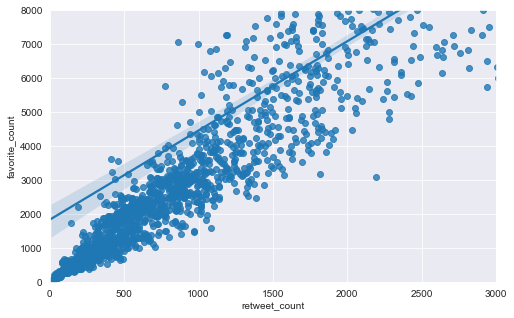

In [292]:
plt.figure(figsize=(8,5))
sns.regplot(x="retweet_count", y="favorite_count", data=master_df)
plt.xlim(0,3000)
plt.ylim(0,8000)

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

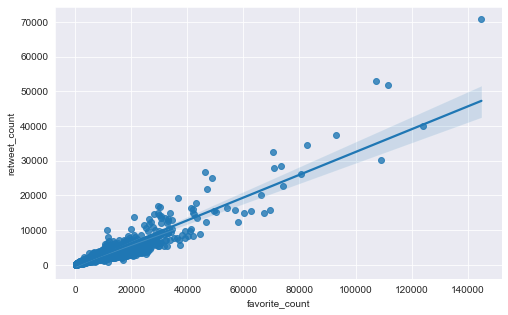

In [293]:
plt.figure(figsize=(8,5))
sns.regplot(x="favorite_count", y="retweet_count", data=master_df)

### The two plots show that there is an obvious linear relationship between  the number of likes and retweets of a tweet.
This means, by increasing in likes there will be an increase in retweets and vice versa. However, more detailed analysis could be carried out to be sure that these two variables are interchangeable in all cases and if there is any priority in choosing each as a measure of popularity.

### Final Step
Storing the dataframe into a new file

In [294]:
master_df.to_csv('twitter_archive_master.csv', index=False)